In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eq_time = 1
start_time = 29. #mu s
stop_time = 100 #mu s
dt  = 10 # ps

folder = "./run/sim_epsAB_day30_mon3-"

irc_df = pd.read_csv(f"{folder}IRC_AB.txt")
eps_df = pd.read_csv(f"{folder}EPS_AB.txt")

derivatives = -(irc_df - irc_df.mean())*(eps_df - eps_df.mean())


start_step = int((eq_time+start_time)*1000/(dt/1000))
stop_step = int((eq_time+stop_time)*1000/(dt/1000))

start_index = np.argmin(np.abs(irc_df["Step"].values - start_step))
stop_index = np.argmin(np.abs(irc_df["Step"].values - stop_step))

print(start_step)
print(stop_step)

#mean_pair_numbers = derivatives.loc[start_index:stop_index-1].mean()
derivatives.loc[start_index:stop_index-1]

3000000
10100000


Step  UL132-UL132     UL88-UL132  UL48-UL132  UL47-UL132  \
115999 -4.410053e+12   582.628473  125634.142256    1.572411    0.318264   
116000 -4.409948e+12   291.221396  116231.943732    1.050317   -0.069539   
116001 -4.409843e+12   682.191144  114429.793544    3.118366   -0.058800   
116002 -4.409738e+12   483.380104  116674.984339    2.715660    0.318264   
116003 -4.409633e+12   257.737477   92503.107047    3.331461    0.318264   
...              ...          ...            ...         ...         ...   
399994 -2.499863e+13  2149.953744  235439.210267   -0.048535   -0.779248   
399995 -2.499888e+13  2026.120720  251477.471285    0.241694   -0.387209   
399996 -2.499913e+13  1667.332559  243758.434612    0.241694   -0.453651   
399997 -2.499938e+13  2968.593803  246860.255441    0.241694   -0.590280   
399998 -2.499963e+13  2254.073452  238344.881842    0.241694    0.318264   

        UL94-UL132  UL35-UL132  UL100-UL132  UL25-UL132  UL82-UL132  ...  \
115999     0.00283    0.029723     0.777058   19.559438    1.745845  ...   
116000     0.00283    0.029723     0.096160   19.559438   -8.535032  ...   
116001     0.00283    0.029723     0.362904   16.182584   19.520703  ...   
116002     0.00283    0.029723     0.777058   15.530436   11.331358  ...   
116003     0.00283    0.029723     0.777058   11.956099   35.157196  ...   
...            ...         ...          ...         ...         ...  ...   
399994     0.00283    0.029723     0.777058   10.918988    5.491989  ...   
399995     0.00283    0.029723     0.777058    8.425351   19.127106  ...   
399996     0.00283    0.029723     0.777058    8.384898   18.333838  ...   
399997     0.00283    0.029723     0.777058   12.195169   28.238168  ...   
399998     0.00283    0.143179     0.777058   16.161493    3.642570  ...   

         UL100-UL100  UL25-UL100  UL82-UL100  UL83-UL100     UL25-UL25  \
115999  1.118497e+05    1.388829  153.037207   23.236930  8.022399e+04   
116000  1.144541e+05    1.388829  173.353565   -3.646056  5.702603e+04   
116001  1.035980e+05    1.388829  318.074907   19.138544  5.897167e+04   
116002  1.219462e+05    1.388829  125.641110   23.333885  5.175313e+04   
116003  1.214698e+05    1.388829   57.673928    6.749344  5.230719e+04   
...              ...         ...         ...         ...           ...   
399994  1.191439e+06    1.388829  696.220419  193.183396  1.047100e+06   
399995  1.226179e+06    1.388829   64.621855  161.613868  1.101550e+06   
399996  1.205837e+06    1.388829   81.959662  231.363961  1.136264e+06   
399997  1.198608e+06    1.388829  -73.362263  248.249623  1.158432e+06   
399998  1.155191e+06    1.388829    0.375253  257.934516  1.185371e+06   

           UL82-UL25  UL83-UL25   UL82-UL82    UL83-UL82   UL83-UL83  
115999  16012.479590  12.385681   -0.048218   887.847068 -338.868094  
116000  15752.158920  -0.311527  -67.570458   791.080201  -16.889780  
116001  11900.349821  15.920570   13.392711   435.108073   92.161542  
116002  13819.398130   9.111795  219.224094   341.530999   39.053619  
116003  13350.604492  43.622869  250.511797  -144.672468  745.455134  
...              ...        ...         ...          ...         ...  
399994  13485.920137  53.259574 -329.559568     0.797959  912.592731  
399995  17355.312002  30.076292 -613.783631     4.430059  128.392273  
399996  20116.158795  32.513534  136.353902   841.666991 -155.750715  
399997  19812.364677  22.614449  -63.941100   948.132015 -149.894100  
399998  16922.707519  13.370696  641.682105  1372.559865  192.650853  

[284000 rows x 56 columns]

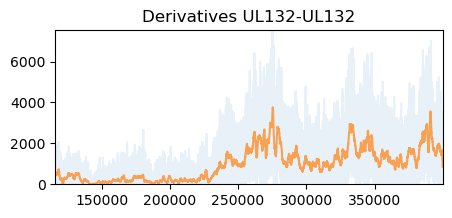

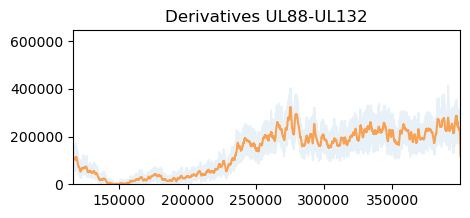

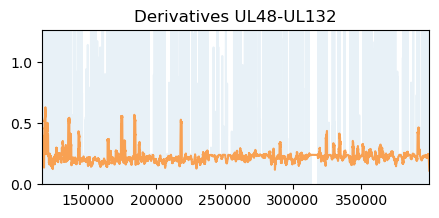

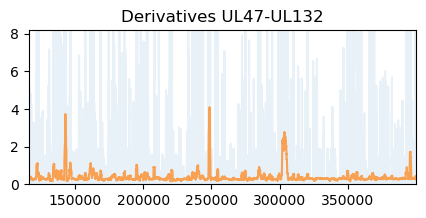

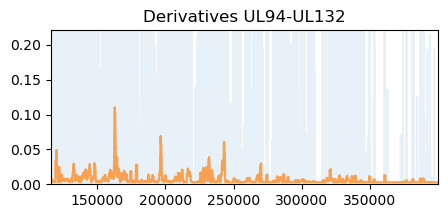

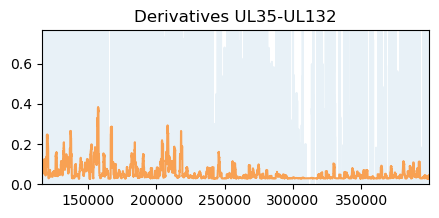

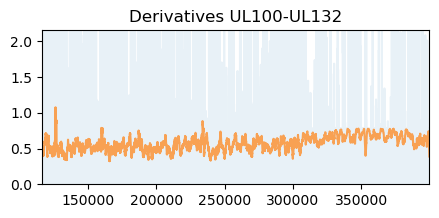

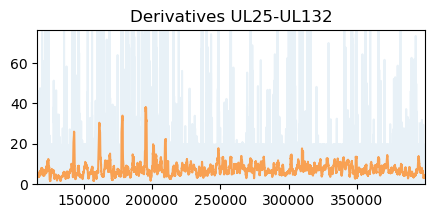

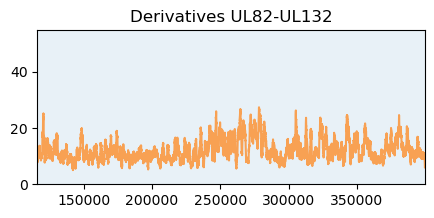

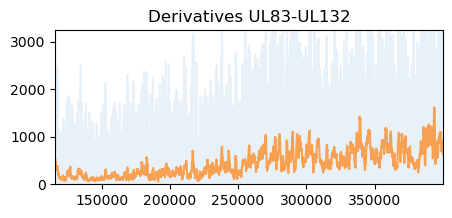

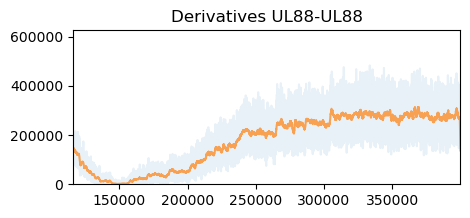

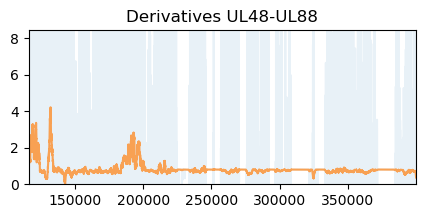

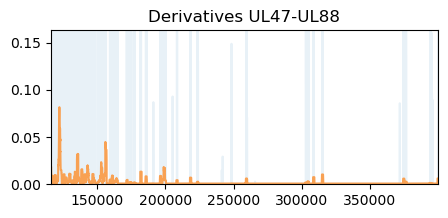

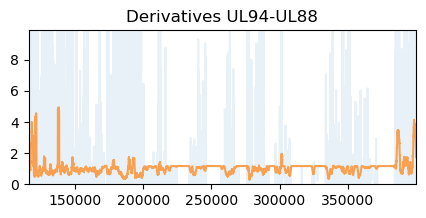

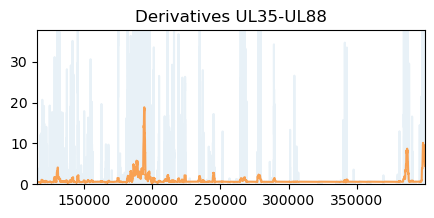

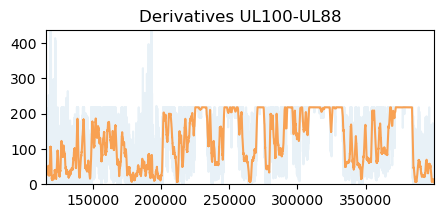

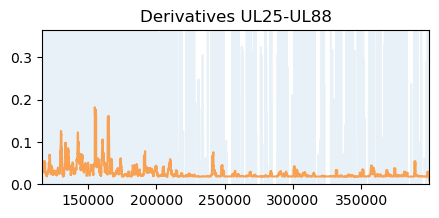

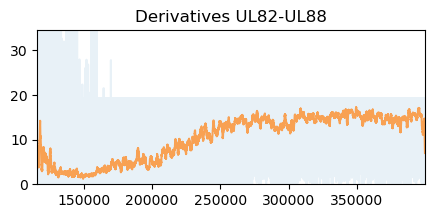

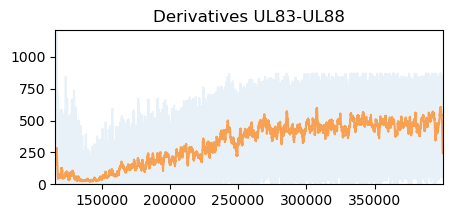

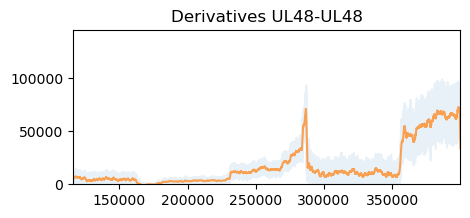

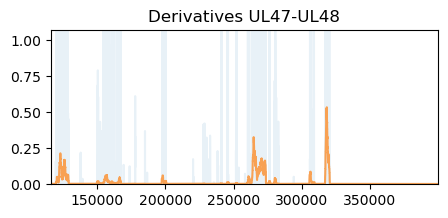

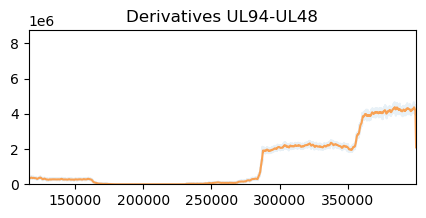

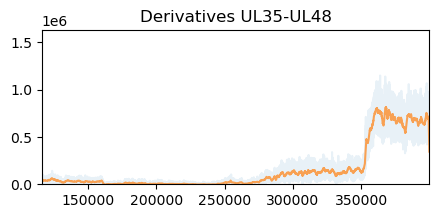

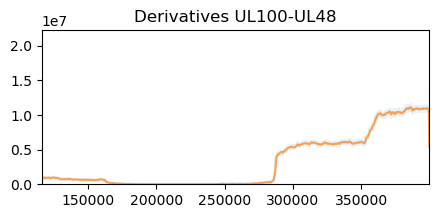

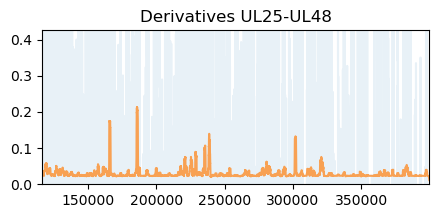

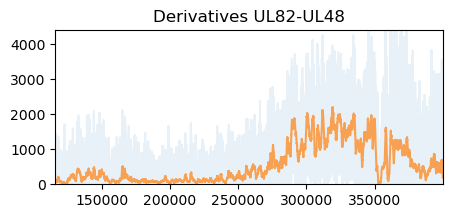

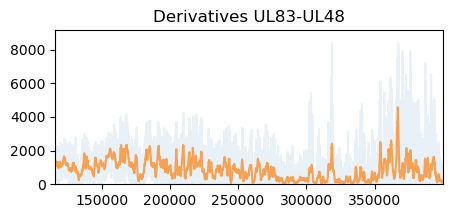

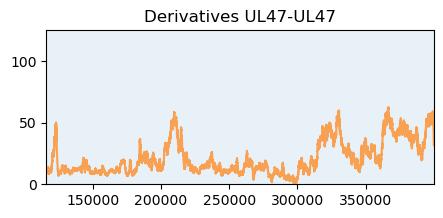

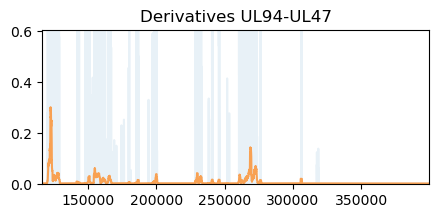

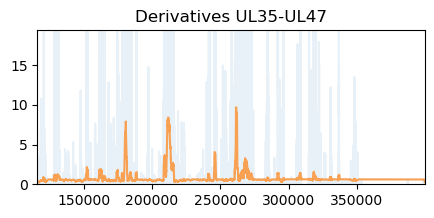

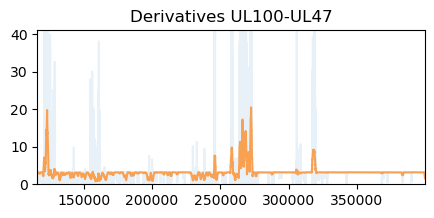

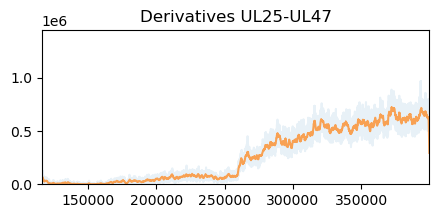

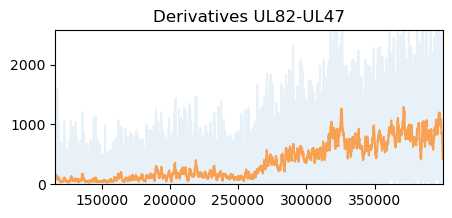

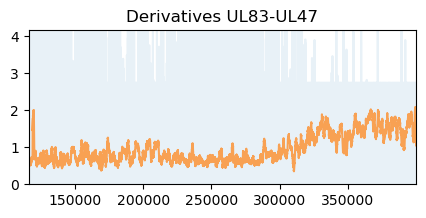

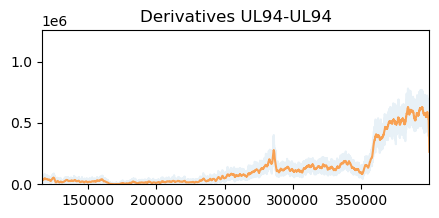

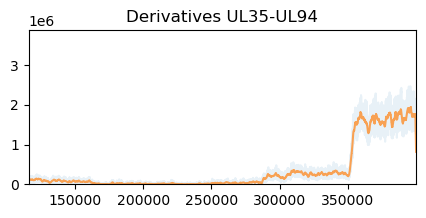

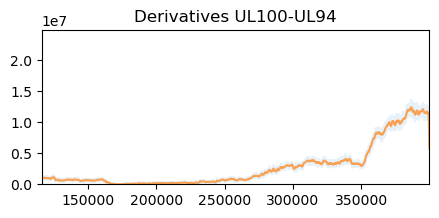

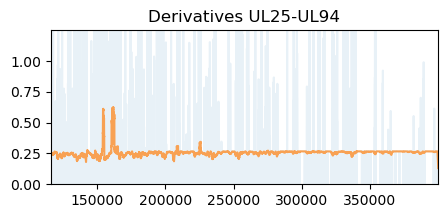

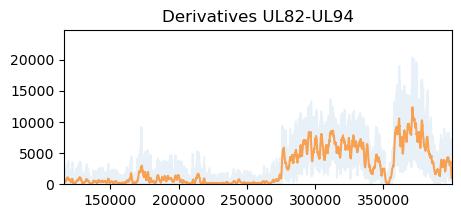

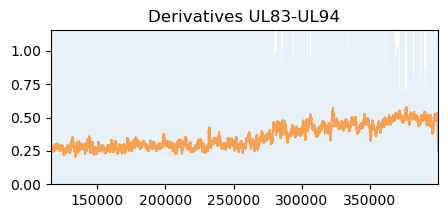

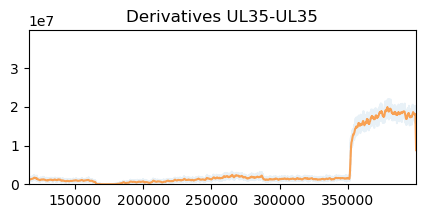

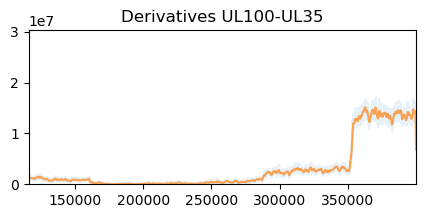

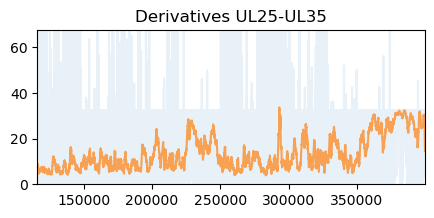

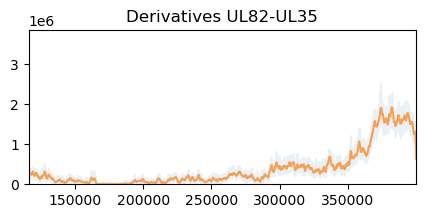

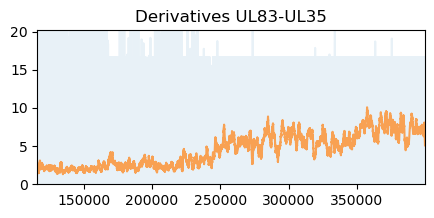

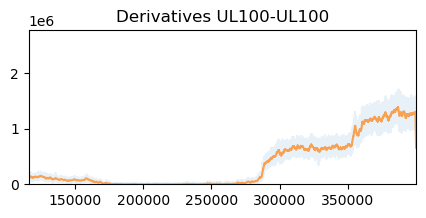

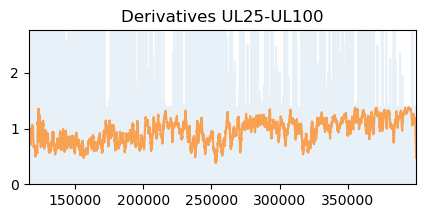

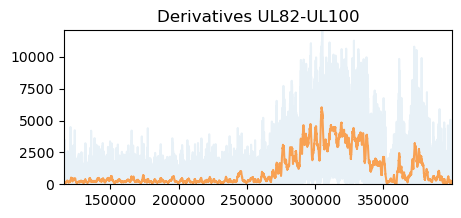

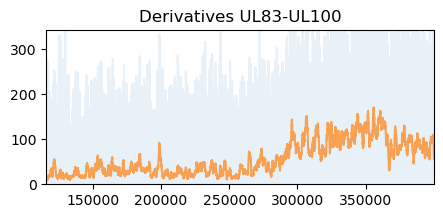

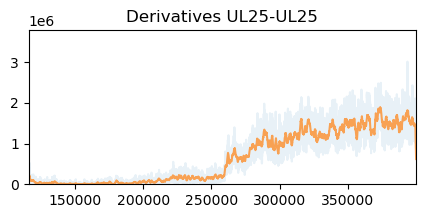

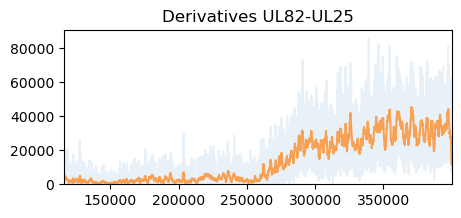

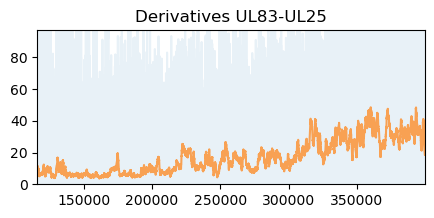

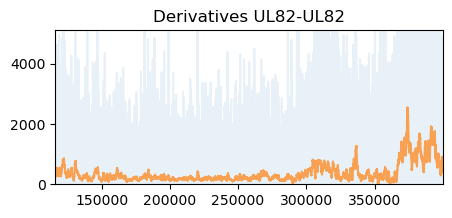

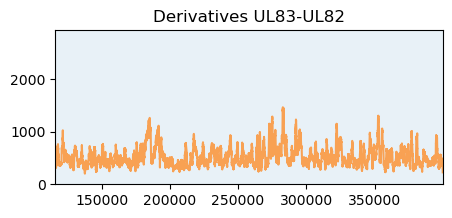

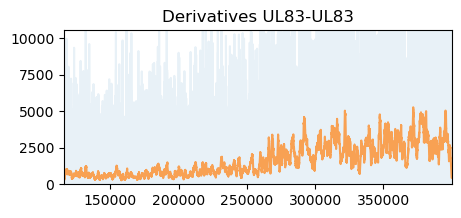

In [15]:
# this small script serves to indentify out of equilibrium pair numbers

smoothing_para = 1000
max_dev = 0.00005

for key in derivatives.columns:
    if key == "Step":
        continue
    first_ten = derivatives[key][:len(derivatives)//10].mean()
    last_ten = derivatives[key][(len(derivatives) - len(derivatives)//10):].mean()
    
    rel_dev = np.abs(first_ten/last_ten - 1)
    if rel_dev > max_dev:
        number_array = derivatives[key]
        smoothed_array = np.convolve(number_array.values, (1/smoothing_para)*np.ones(smoothing_para), mode="same")
        
        plt.figure(figsize=[5, 2])
        plt.title("Derivatives " + key)
        plt.plot(number_array, label="raw", alpha=0.1)
        plt.plot(smoothed_array, label="smoothed", alpha=0.7)
        plt.ylim([0, 2*smoothed_array[start_index:stop_index].max()])
        plt.xlim([start_index, stop_index])
        plt.show()

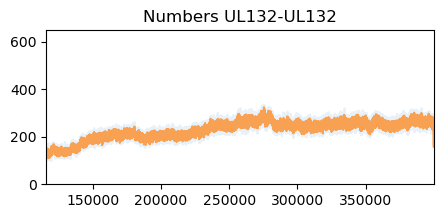

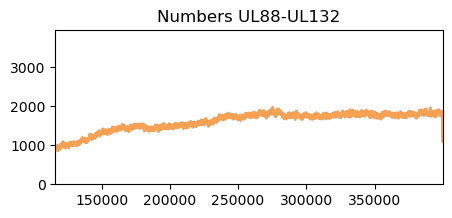

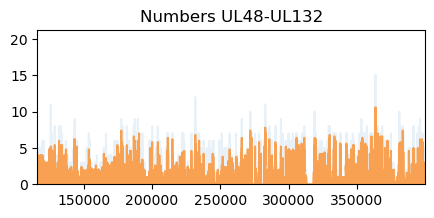

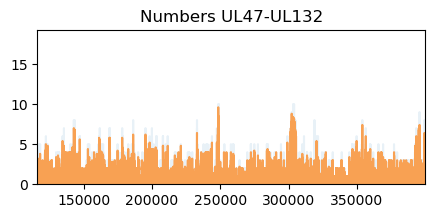

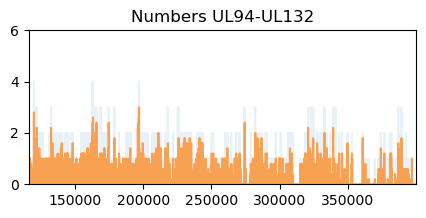

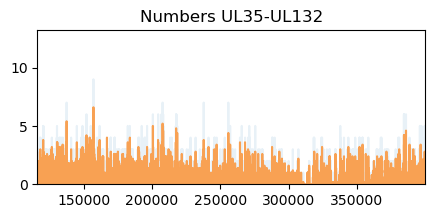

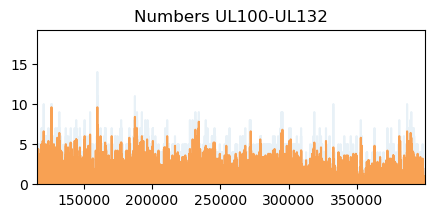

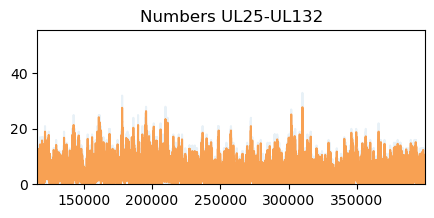

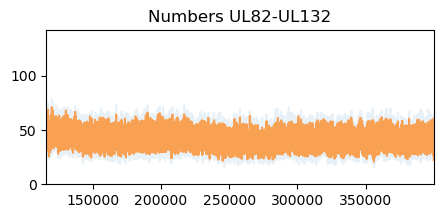

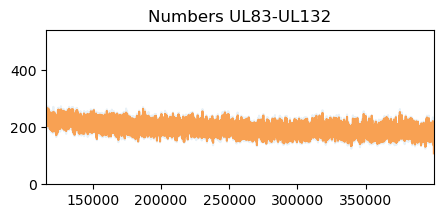

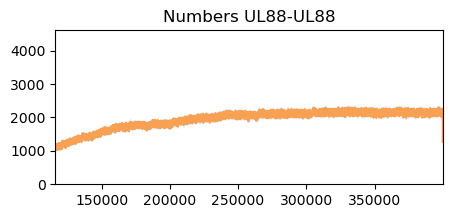

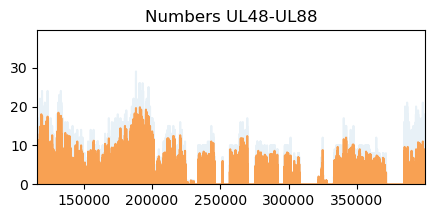

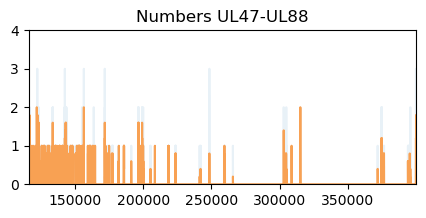

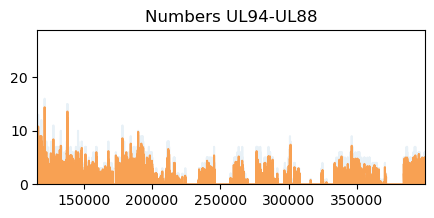

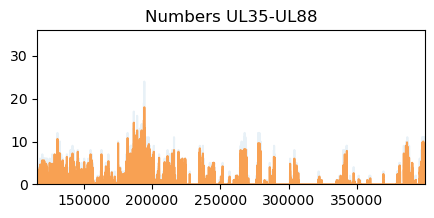

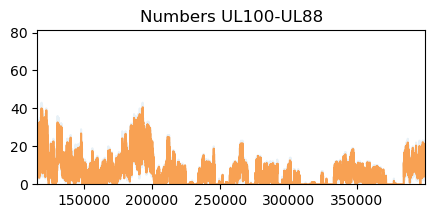

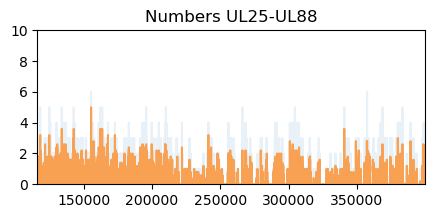

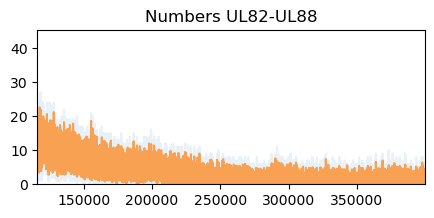

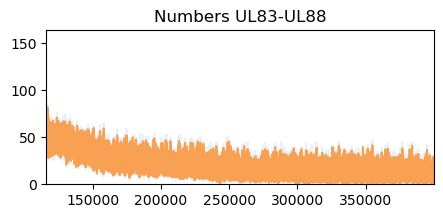

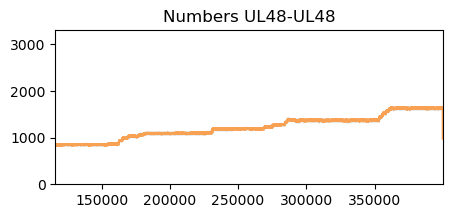

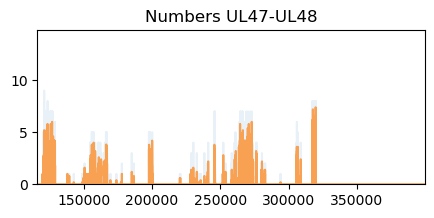

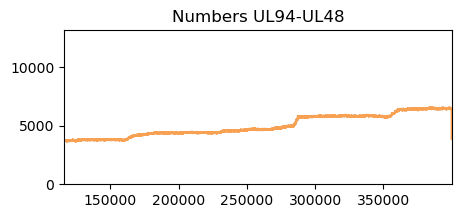

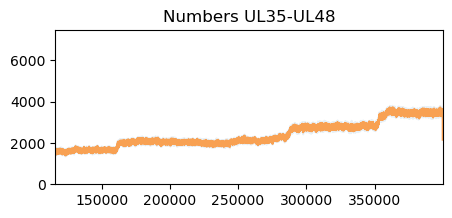

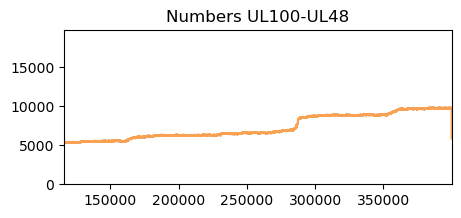

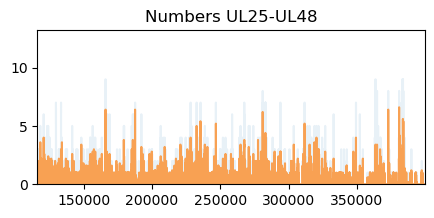

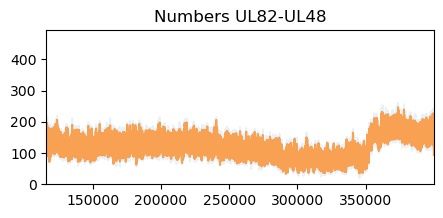

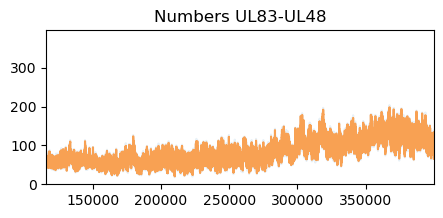

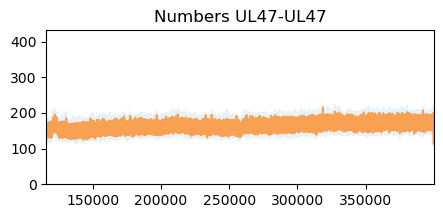

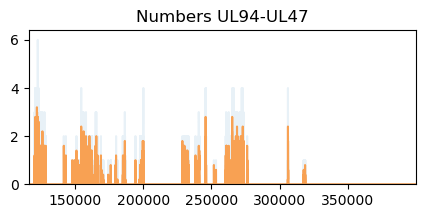

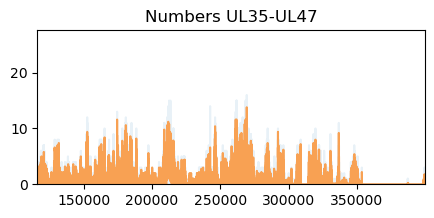

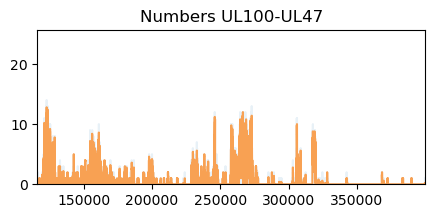

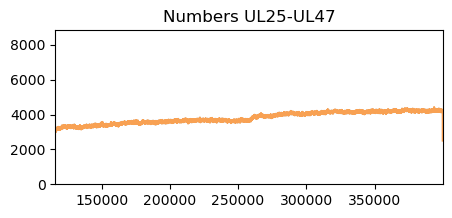

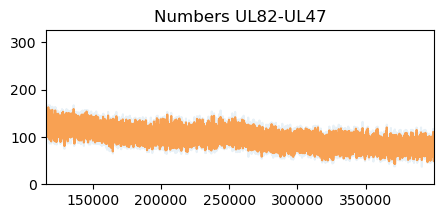

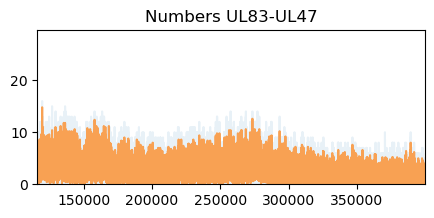

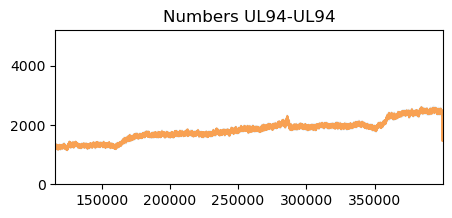

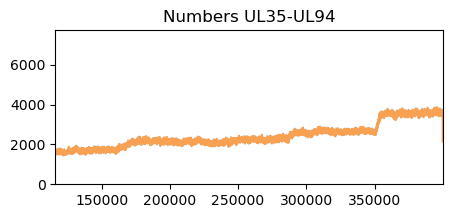

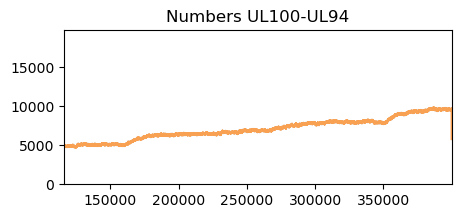

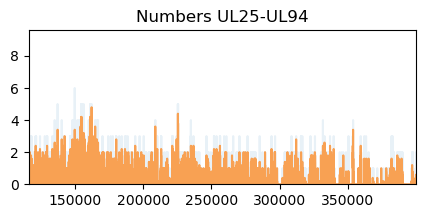

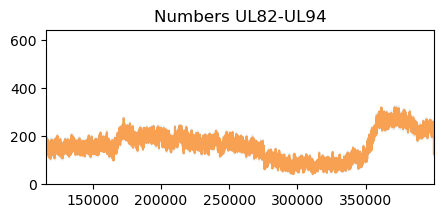

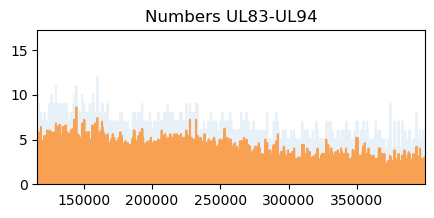

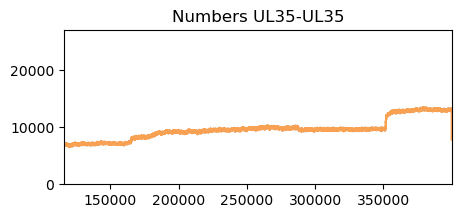

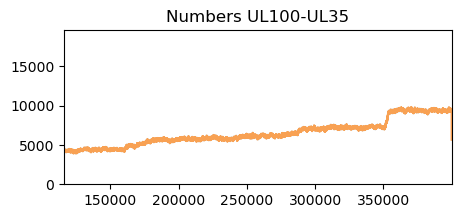

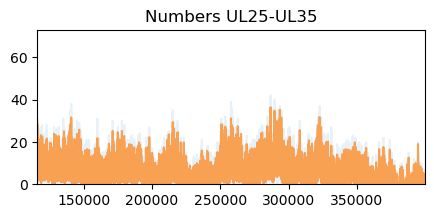

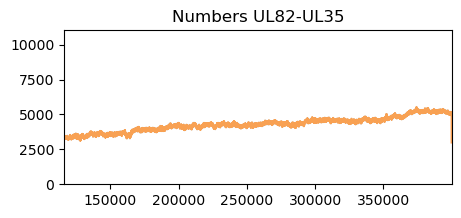

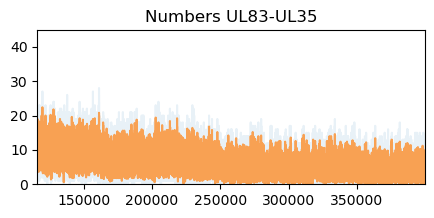

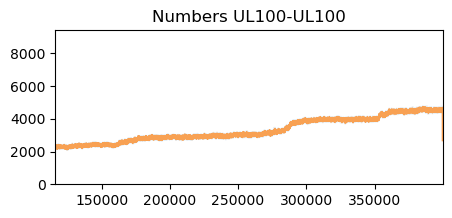

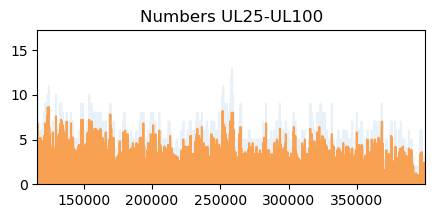

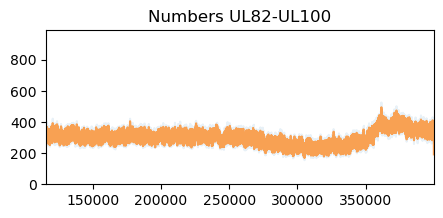

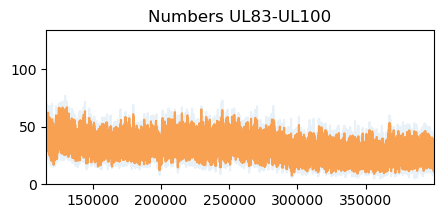

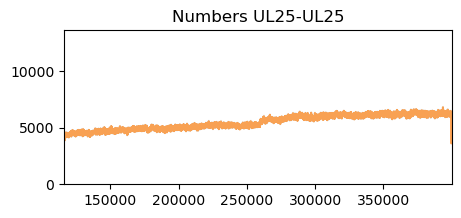

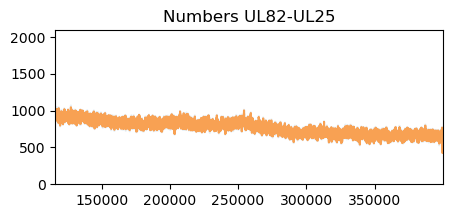

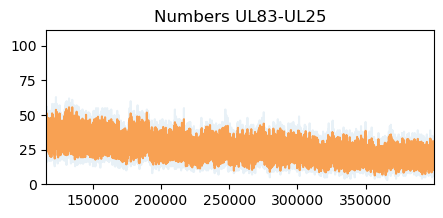

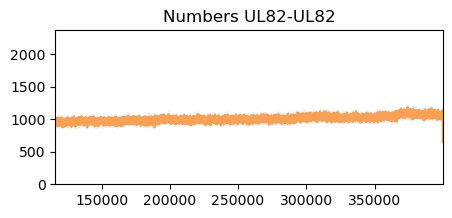

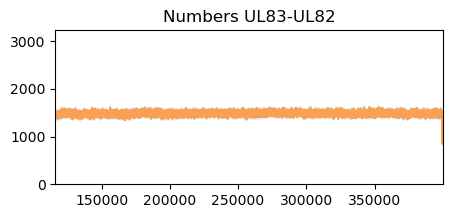

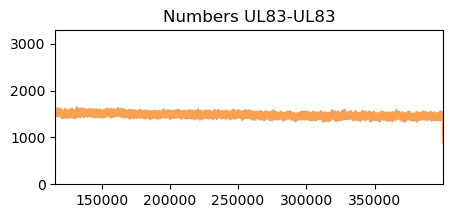

In [16]:
# this small script serves to indentify out of equilibrium pair numbers

smoothing_para = 5
max_dev = 0.00005

for key in eps_df.columns:
    if key == "Step":
        continue
    first_ten = derivatives[key][:len(derivatives)//10].mean()
    last_ten = derivatives[key][(len(derivatives) - len(derivatives)//10):].mean()
    
    rel_dev = np.abs(first_ten/last_ten - 1)
    if rel_dev > max_dev:
        number_array = irc_df[key]
        smoothed_array = np.convolve(number_array.values, (1/smoothing_para)*np.ones(smoothing_para), mode="same")
        
        plt.figure(figsize=[5, 2])
        plt.title("Numbers " + key)
        plt.plot(number_array, label="raw", alpha=0.1)
        plt.plot(smoothed_array, label="smoothed", alpha=0.7)
        plt.ylim([0, 2*smoothed_array[start_index:stop_index].max()])
        plt.xlim([start_index, stop_index])
        plt.show()

In [10]:
ff_df = pd.read_csv("./exampleFF_DF.csv", index_col=0)
ff_df["N_pairs"] = None
ff_df["N_pair_std"] = None
ff_df["ref_eps"] = None
mean_pair_numbers = irc_df[start_index:stop_index].mean()
err_pair_numbers = irc_df[start_index:stop_index].std()

for i, row in ff_df.iterrows():
    pair_keya = row["ProteinA"] + "-" + row["ProteinB"]
    
    ff_df.loc[i,"ref_eps"] = row["Eps_AB"]
    ff_df.loc[i,"N_pairs"] = mean_pair_numbers[pair_keya]
    ff_df.loc[i,"N_pair_std"] = err_pair_numbers[pair_keya]

ff_df["Eps_AB"] = 0.
ff_df

ProteinA ProteinB  Eps_AB      N_pairs   N_pair_std   ref_eps
0      UL83    UL132     0.0   213.986582    35.588337 -0.275998
1      UL83     UL88     0.0    38.741124    35.847876 -0.186381
2      UL83     UL48     0.0    96.545509    63.939466   0.37667
3      UL83     UL47     0.0     4.140335     3.929773  -3.93289
4      UL83     UL94     0.0     2.344651      4.11186 -3.995399
5      UL83     UL35     0.0     9.416036     8.910325 -2.852184
6      UL83    UL100     0.0    41.612172    29.312271  -2.16073
7      UL83     UL25     0.0    32.536981    15.141885 -3.993441
8      UL83     UL82     0.0  1470.373953    49.922696 -2.253403
9      UL83     UL83     0.0  1513.477736    77.181688 -0.809791
10     UL82    UL132     0.0    44.476904     8.164113 -3.429982
11     UL82     UL88     0.0     8.185578     9.091702 -2.608443
12     UL82     UL48     0.0   133.731174    51.220934 -0.437452
13     UL82     UL47     0.0   116.613742    39.456183   -0.9247
14     UL82     UL94     0.0   171.333378    80.706124  1.540766
15     UL82     UL35     0.0  3875.501389   821.917071  1.221789
16     UL82    UL100     0.0   316.854962    63.629866 -1.298799
17     UL82     UL25     0.0   874.456001   194.354588  0.431794
18     UL82     UL82     0.0   991.015353    49.787439 -3.106198
19     UL25    UL132     0.0     5.892077     4.729765 -0.158111
20     UL25     UL88     0.0     0.330956     0.781602 -3.686543
21     UL25     UL48     0.0     0.402884     1.156445  -3.81554
22     UL25     UL47     0.0  3383.588901   775.106009  1.678461
23     UL25     UL94     0.0     0.799504      3.38746 -0.996474
24     UL25     UL35     0.0     9.436429    11.136802 -0.820264
25     UL25    UL100     0.0     2.322191     4.940177 -2.308524
26     UL25     UL25     0.0  4731.207618  1324.884812  0.557606
27    UL100    UL132     0.0     1.898825     2.936312 -2.540676
28    UL100     UL88     0.0    17.406681    23.026173   0.96863
29    UL100     UL48     0.0  6350.700504  2094.183969  1.526325
30    UL100     UL47     0.0      2.16269     5.360642  0.765265
31    UL100     UL94     0.0  5955.287868  2171.004103  1.268399
32    UL100     UL35     0.0  5421.604569   2201.56096  1.110052
33    UL100    UL100     0.0   2830.02621  1018.762794 -0.623422
34     UL35    UL132     0.0     0.345571     0.794329 -1.812637
35     UL35     UL88     0.0      1.10727     2.172031 -0.115504
36     UL35     UL48     0.0  2001.014665   816.913765 -0.026419
37     UL35     UL47     0.0     1.189025     2.594677 -0.268886
38     UL35     UL94     0.0  2027.463344   819.573556   0.55035
39     UL35     UL35     0.0  8263.591981  2733.739669  1.252205
40     UL94    UL132     0.0     0.121998     0.432452 -2.072297
41     UL94     UL88     0.0     1.588091     2.447568 -0.692871
42     UL94     UL48     0.0  4346.431066  1360.377178  1.984227
43     UL94     UL47     0.0     0.155178     0.561907 -3.801697
44     UL94     UL94     0.0  1517.876582   582.599878 -0.218273
45     UL47    UL132     0.0     0.818352     1.280191 -0.752778
46     UL47     UL88     0.0       0.0629     0.291726 -3.352463
47     UL47     UL48     0.0     0.181378     0.714151 -3.585468
48     UL47     UL47     0.0   152.106725    24.644007 -3.982429
49     UL48    UL132     0.0     0.832075     1.708052 -1.694048
50     UL48     UL88     0.0     2.367143     3.516862   -1.6646
51     UL48     UL48     0.0  1036.993185   369.102986 -1.534955
52     UL88    UL132     0.0  1284.618849   571.553513  1.642794
53     UL88     UL88     0.0  1547.560889   684.748884  1.401158
54    UL132    UL132     0.0   180.788132     84.02921 -2.236214

In [5]:
ff_df.to_csv("testReferenceFF_df.csv")

In [6]:
ff_df

ProteinA ProteinB  Eps_AB      N_pairs  N_pair_std   ref_eps
0      UL83    UL132     0.0   251.189432   16.824558 -0.275998
1      UL83     UL88     0.0    78.783114   14.686259 -0.186381
2      UL83     UL48     0.0    95.299432   19.073605   0.37667
3      UL83     UL47     0.0     5.476477    2.524471  -3.93289
4      UL83     UL94     0.0     2.662295    1.737658 -3.995399
5      UL83     UL35     0.0    13.309295    4.524108 -2.852184
6      UL83    UL100     0.0    50.173091    8.416853  -2.16073
7      UL83     UL25     0.0    45.863841    7.882754 -3.993441
8      UL83     UL82     0.0  1455.567455   36.196527 -2.253403
9      UL83     UL83     0.0  1569.962136   35.095936 -0.809791
10     UL82    UL132     0.0    51.231159    6.986482 -3.429982
11     UL82     UL88     0.0    19.009182    4.868437 -2.608443
12     UL82     UL48     0.0   138.320886      21.454 -0.437452
13     UL82     UL47     0.0    149.60575   15.310254   -0.9247
14     UL82     UL94     0.0   141.737727   20.970005  1.540766
15     UL82     UL35     0.0  2930.232341  185.927207  1.221789
16     UL82    UL100     0.0   322.175614   26.282505 -1.298799
17     UL82     UL25     0.0  1094.859114   45.252856  0.431794
18     UL82     UL82     0.0   947.715636   26.789287 -3.106198
19     UL25    UL132     0.0     8.508477    3.985356 -0.158111
20     UL25     UL88     0.0     0.750205    0.914235 -3.686543
21     UL25     UL48     0.0      0.63875    0.869557  -3.81554
22     UL25     UL47     0.0  2471.235295  124.531304  1.678461
23     UL25     UL94     0.0     0.472773    0.828883 -0.996474
24     UL25     UL35     0.0    15.389114    7.193243 -0.820264
25     UL25    UL100     0.0     3.235864    2.110788 -2.308524
26     UL25     UL25     0.0   3036.25875  174.862194  0.557606
27    UL100    UL132     0.0     4.183364    3.143234 -2.540676
28    UL100     UL88     0.0      40.3875   27.233515   0.96863
29    UL100     UL48     0.0  4316.602636  262.522924  1.526325
30    UL100     UL47     0.0     1.962841    1.918048  0.765265
31    UL100     UL94     0.0  3493.674136  337.014217  1.268399
32    UL100     UL35     0.0  3030.595568  329.827818  1.110052
33    UL100    UL100     0.0  1779.004432  124.894471 -0.623422
34     UL35    UL132     0.0     0.510909    0.791107 -1.812637
35     UL35     UL88     0.0     1.798773    2.095237 -0.115504
36     UL35     UL48     0.0  1143.858636  115.493151 -0.026419
37     UL35     UL47     0.0     1.791068    2.123027 -0.268886
38     UL35     UL94     0.0     1147.868  138.436418   0.55035
39     UL35     UL35     0.0  5345.000614  520.563108  1.252205
40     UL94    UL132     0.0     0.216773    0.510274 -2.072297
41     UL94     UL88     0.0     3.948955     2.91874 -0.692871
42     UL94     UL48     0.0  2962.242568  200.864196  1.984227
43     UL94     UL47     0.0     0.123341     0.38782 -3.801697
44     UL94     UL94     0.0   822.187114  114.076391 -0.218273
45     UL47    UL132     0.0     1.107523    1.226264 -0.752778
46     UL47     UL88     0.0     0.121205    0.358366 -3.352463
47     UL47     UL48     0.0     0.078591    0.381575 -3.585468
48     UL47     UL47     0.0   137.657523   10.805999 -3.982429
49     UL48    UL132     0.0        1.332    1.345244 -1.694048
50     UL48     UL88     0.0     4.043795    3.728187   -1.6646
51     UL48     UL48     0.0   632.218523   63.830065 -1.534955
52     UL88    UL132     0.0   493.603568  102.634566  1.642794
53     UL88     UL88     0.0   613.188341  148.065155  1.401158
54    UL132    UL132     0.0    64.694023   14.481226 -2.236214